<a href="https://colab.research.google.com/github/daphnecor/Computational_neuroscience/blob/main/ACNS_Week1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Computational Neuroscience
```
Student: Daphne Cornelisse (s1066862)
``` 


# Weekly exercises 

## DA Chapter 1: Ex. 1 

>  Generate spikes for 10 s (or longer if you want better statistics) using
a Poisson spike generator with a constant rate of 100 Hz, and record
their times of occurrence. Compute the coefficient of variation of the
interspike intervals, and the Fano factor for spike counts obtained
over counting intervals ranging from 1 to 100 ms. Plot the interspike
interval histogram.

In [ ]:
'''
Dependencies
'''
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')
sns.set_style('white')
# to change default color cycle
color_scheme = ['#616F85', '#C2BAA3', '#F5E6CE', '#DD9D7C', '#C9445F']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_scheme)
np.random.seed(0) # reproducability

In [ ]:
'''
Parameterise
'''
T = 10 # s
dt = 0.001 # ms
lam = 100 # firing rate (Hz) 
N = int(T/dt)  # steps

In [ ]:
'''
Generate 10 spike trains
'''
y = np.zeros((T, N))

for i in range(T):
  for j in range(N):
    if np.random.uniform(0,1) < lam*dt: y[i,j] = 1 

An interspike interval (ISI) is the time in-betweensubsequent spikes. Computing the differences between spikes for a spike-train yields a distribution. 

<!-- ![](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/w/images/3/38/Spiketimes.png) -->

<img src="https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/w/images/3/38/Spiketimes.png" alt="drawing" width="400"/>

In [ ]:
isi = []
for tr in range(T):
  y_tr = y[tr, :] # take spike train of one trial
  spike_times = np.where(y_tr==1) # find indices where neuron spikes
  isi.append(list(np.diff(spike_times)[0])) # store interspike-intervals 

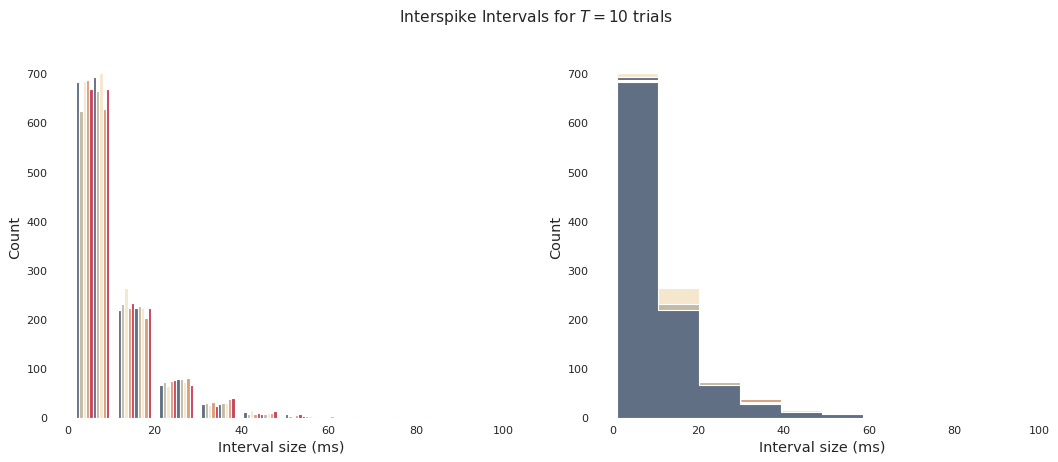

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), dpi=80)
fig.suptitle(r'Interspike Intervals for $T=10$ trials', fontsize=14)
ax1.hist(isi)
ax1.set_xlabel('Interval size (ms)', fontsize=13)
ax1.set_ylabel('Count', fontsize=13);

ax2.hist(isi, histtype='stepfilled')
ax2.set_xlabel('Interval size (ms)', fontsize=13)
ax2.set_ylabel('Count', fontsize=13)
sns.despine(left=True, bottom=True);

The Coefficient of variation is the ratio of the standard deviation to the mean 
\begin{align}
  C_V = \frac{\sigma_{\tau}}{\langle \tau \rangle}
\end{align}

In [ ]:
'''
Coefficient of variation
'''
Cv_arr = []
for tr in range(T): # iterate through trials
  isi_tr = y[:, tr] 
  Cv_arr.append(np.mean(isi_tr) / np.std(isi_tr))

Cv_arr

[0.49999999999999994,
 0.49999999999999994,
 0.6546536707079772,
 nan,
 nan,
 nan,
 0.3333333333333333,
 nan,
 nan,
 0.3333333333333333]

The Fano Factor is another measure to quantify the amount of variability in a spike train. It is defined as 
\begin{align}
 F = \frac{\sigma^2}{\langle n \rangle}
\end{align}
where $\sigma^2$ is the variance and $\langle n \rangle$ the expected value


In [ ]:
'''
Fano factor
'''

ls = []

counting_intervals = int(N/100) # intervals of 100 ms

for i in range(counting_intervals):
  ls.append(np.var(counts) / np.mean(counts))

## Handouts Chapter 2

### Ex. 1

---

> Show that the Gamma distribution for large $N$ becomes the Gaussian distribution.

---

Let $X$ be a random variable sampled from a Gamma distribution. The probability density of a Gamma distribution is
\begin{align}
  f(x) = \frac{1}{\Gamma(n) \beta^n} x^{n - 1} e^{-x/\beta} \qquad \text{ for } x > 0, \, n, \beta > 0
\end{align}
with
\begin{align}
  \mathbb{E}[X] = n \beta \, \text{ and } \, \text{Var}[X] = n\beta^2
\end{align}
and the Gamma function is defined as
\begin{align}
  \Gamma(n) = \int_0^\infty x^{\alpha - 1} e^{-x} dx
\end{align}
The Gamma distribution is directly related to the students t distribution
\begin{align}
  f(x) = \frac{\Gamma (\frac{n+1}{2})}{\sqrt{\pi n} \Gamma(\frac{n}{2})} \left( 1 + \frac{x^2}{n} \right)^{-\frac{n+1}{2}}
\end{align}
where $n$ denotes the degrees of freedom.

By the Central Limit Theorem it follows that for large N - as $N \rightarrow \infty$ - the t-distribution converges to the Normal distribution with $\mathcal{N}(0,1)$. Thus, the Gamma distribution converges to the Normal distribution. 


### Ex. 2

---

> Verify that the Laplace transformation of $f(t)=\frac{1}{\sqrt \pi t}$ is $\hat{f}(s) = \frac{1}{\sqrt s}$

---

### Ex. 3a

---

> For a diffusion process in one dimension that starts at $t=t_0$ at location $v=v_0$, the probability to observe the membrane potential $v$ at a later $t$ is given by
\begin{align}
  p(t, v | t_0, v_0) = \frac{1}{\sqrt{2 \pi (t-t_0)\sigma}} \exp \left(- \frac{(v-\langle v \rangle_t)^2)}{2\sigma^2 (t-t_0)} \right)
\end{align}
with $\langle v \rangle_t = v_0 + \mu (t-t_0)$. The first passage time distribution satisfies the integral equation
\begin{align}
  p(t, v_{th} | 0,0) = \int_0^t dt' p(t, v_{th} | t', v_{th}) \rho(t', v_{th})
\end{align}
a) Using Laplace transforms, compute the first passage time distribution for $\mu=0$, following the derivation in the text.

---



## DA Chapter 5: Ex 3.

---

> Build a model integrate-and-fire neuron from equation 5.8. Use $V_{rest} = -70$ mV, $R_m = 10$ MQ, $\tau_m = 10$ ms. Initially set $V = V_{rest}$.
When the membrane reaches $V_{th} = -54$ mV, make the neuron fire a spike and reset the potential to $V_{reset}=-80$ mV. Show sample voltage traces (with spikes) for a 300-ms-long current pulse (choose a reasonable current $I_e$) centered in a 500-ms-long simulation. Determine the firing rate of the model for various magnitudes of constant $I_e$ and compare the results with equation 5.11.

\begin{align}
  \tau_m \frac{dV}{dt} = V_{rest} - V + R_m I_e \qquad [eq. 5.8]
\end{align}

---



In [ ]:
'''
Parameterise integrate-and-fire neuron
'''
v_rest = -70.0 # mV
v_th = -54.0   # mV
v_reset = -80  # mV
R_m = 10.0     # mOhm
tau_m = 10.0   # ms
dt = 0.1       # ms

# differential equation
dvdt = lambda I_e, v: ((v_rest - v) + R_m * I_e)/tau_m

sim_time = 500  # total simulation time (ms)
stim_time = 300 # time that a current is applied (ms)

In [ ]:
def integrate_and_fire(I_e):
  ''' Integrate and fire neuron model '''

  apply_I = np.full(stim_time, I_e)
  no_I = np.zeros(sim_time-stim_time)
  I_range = np.concatenate((apply_I, no_I), axis=0)

  v = np.zeros(sim_time+1) 
  spiketrain = np.zeros(sim_time+1)
  v[0] = v_rest 
      
  for t in range(sim_time):
      I_e = I_range[t]
      v_next = dvdt(I_e, v[t]) # get differential
      v[t+1] = v[t] + v_next * dt # update v
      if v[t+1] > v_th: # check if there is a spike and reset
          v[t+1] = v_reset
          spiketrain[t+1] = 1

  return v, spiketrain, np.where(spiketrain==1), I_range

In [ ]:
'''
Set a current (I_e) and run 
'''
v, spiketrain, spiketimes, I_range = integrate_and_fire(I_e=14)

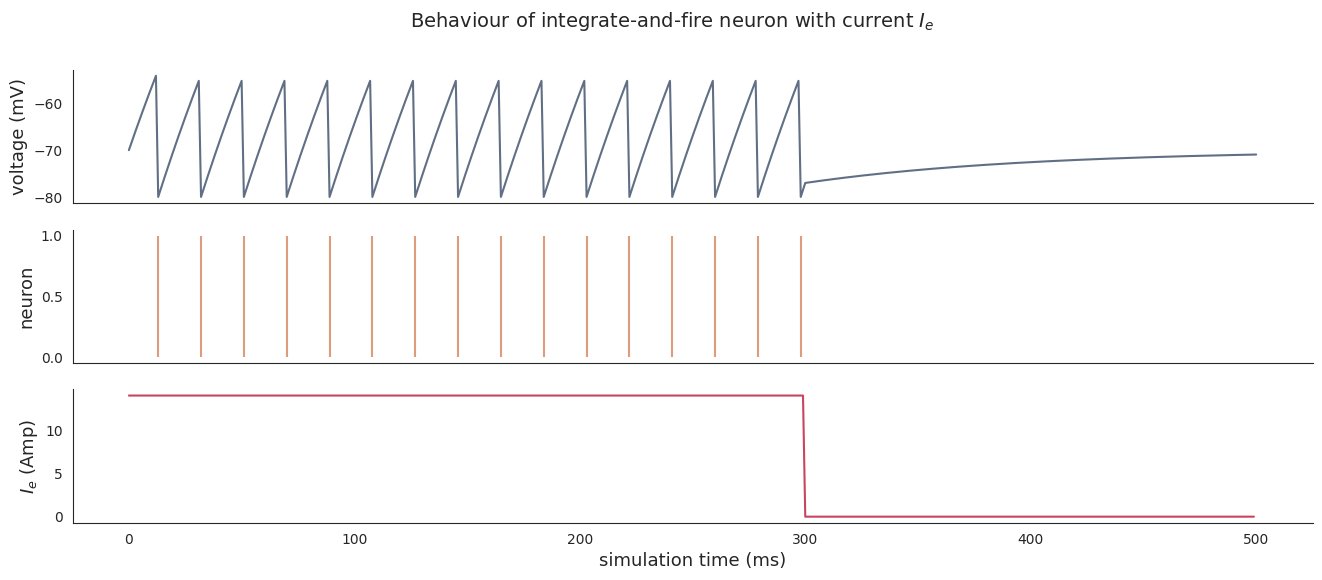

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,6), dpi=100, sharex=True)
fig.suptitle(r'Behaviour of integrate-and-fire neuron with current $I_e$', fontsize=14)
ax1.plot(v)
ax1.set_ylabel('voltage (mV)', fontsize=13)

ax2.vlines(spiketimes, 0, 1, colors=color_scheme[3])
ax2.set_xticks([0, 100, 200, 300, 400, 500])
ax2.set_ylabel('neuron', fontsize=13)

ax3.plot(I_range, c=color_scheme[4])
ax3.set_xlabel('simulation time (ms)', fontsize=13)
ax3.set_ylabel(r'$I_e$ (Amp)', fontsize=13)
sns.despine(left=False, bottom=False);

# Take Home exercises: Drift Diffusion

Generate first passage times (FPT) from the drift distribution model.Check whether the distribution of these times coincide with the FPT distribution $\rho$ that was given in the lecture.

The continuous time diffusion process can be simulated as 
\begin{align}
  v(t+dt) = v(t) + \mu dt + d \xi
\end{align}
where $\mu$ is the mean drift and $d \xi$ is a Gaussian random variable with mean zero and standard deviation $\sigma\sqrt{dt}$. The FPT is the smallest $t$ that $v(t) > v_{th}$.

## 1. Generate diffusion trajectories

---

> Generate $n$ diffusion trajectories $v_i(t) \text{ for } i = 1, \dots , n$ with $0 < t < T$ and $n$ as large as you can. 
Use $dt = 0.001, \mu = 0.1, \sigma = 0.1, v_{th} = 1$ and total time $T = 20$. 

---

In [266]:
'''
Parameterise
'''
n = 1000 # number of trajectories
dt = 0.001 # time step
mu = 0.1 # mean drift
sig = 0.1 # standard deviation 
v_th = 1 # threshold
T = 35 # total time

t = np.linspace(0, T, int(T/dt)) # time 
v = np.zeros((n, int(T/dt))) # store trajectories

dxi = np.random.normal(loc = 0, scale = (sigma * np.sqrt(dt)), size = int(T/dt))
  v_prime = mu*dt + dxi 
  v = np.cumsum(v_prime) # use cumulative sum to add previous timesteps
  # print("v[0:10]", v[0:10])
  # v
  FPT = np.argmax(v > v_th) * dt # get index first occurrence v > v_th and multiply by dt to get time
  
  # If the threshold was not reached, set time to maximal time
  if FPT == 0:
    FPT = T
  return FPT

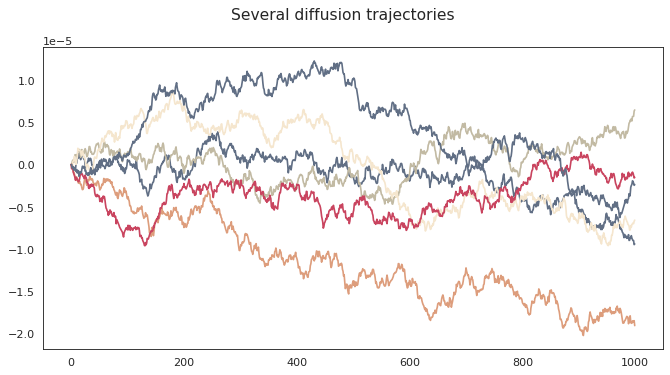

In [279]:
'''
Generate n diffusion trajectories
'''
for k in range(n-1):
  dxi = np.random.normal(loc=0, scale=sig*np.sqrt(dt), size=int(T/dt))
  v[k+1, :] = v[k, :] + mu * dt * + dxi

'''
Plot some diffusion trajectories
'''
fig, ax = plt.subplots(1, figsize=(10,5), dpi=80)
fig.suptitle('Several diffusion trajectories', fontsize=14)
indices = [0, 10, 20, 40, 60, 200]
for i in indices: ax.plot(v[:, i])

## 2. Estimate the FPT for each trial $t_i$

---

> Generate a histogram of FPTs. Hint: For a given final time T it may be that some trajectories have not reached the threshold. This can be solved by increasing T . Alternatively, if they are only very few trials that have not reached the threshold, you can set their FPTs as t = T.

---

In [292]:
np.where(v > v_th)

(array([], dtype=int64), array([], dtype=int64))

In [293]:
FP_times = []

for l in range(n): # iterate through all n trajectories
  # find index of first crossing, take the first index
  FPidx = np.where(v[l, :] > v_th)[0]
  if len(FPidx) == 0: # set FPT to T is threshold is not reached
    FPidx = T
  FP_times.append(FPidx * dt)

In [282]:
FP_times[:10]

[0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035]

## 3. Compare theoretical and estimations

---

> Generate a plot that compares the estimated distribution of first passage times (ie. a histogram with properly chosen bin size ∆t) with the theoretical prediction FPT distribution $\rho$(t) ∆t.

---

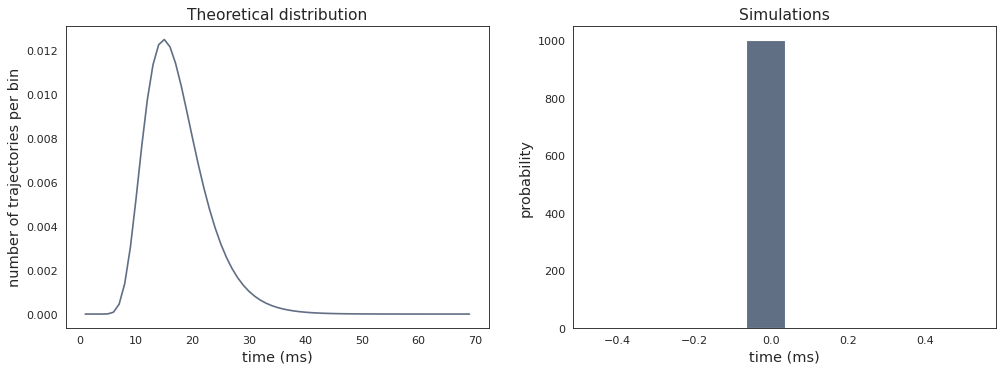

In [297]:
'''
Define theoretical distribution
'''
rho = lambda t: v_th /(np.sqrt(2 * np.pi) * sig * t**3/2) * np.exp(-((v_th - mu*t)**2) / (2*(sig**2)*t))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), dpi=80)

ax1.set_title('Theoretical distribution', fontsize=14)
ax1.plot(rho(np.arange(0, T, 0.5)));
ax1.set_xlabel('time (ms)', fontsize=13)
ax1.set_ylabel('number of trajectories per bin', fontsize=13)

ax2.set_title('Simulations', fontsize=14)
ax2.hist(FP_times, );
ax2.set_xlabel('time (ms)', fontsize=13)
ax2.set_ylabel('probability', fontsize=13);

## 4. Maximum likelihood

---

> Show that the maximum likelihood estimates are given by
\begin{align}
& \mu = \frac{1}{\bar{t}}
& \sigma^2 = f - \frac{1}{\bar{t}}
\end{align}
with 
\begin{align}
\bar{t} = \frac{1}{n} \sum_{i = 1}^{n} t_i \qquad \text{ and } \qquad 
f = \frac{1}{n} \sum_{i = 1}^{n} \frac{1}{t_i}
\end{align}

---

## 5. Generate data with μ and σ

---

> Generate different datasets and compare the empirical estimates of μ and σ with the model values for distinct values for μ and σ.

---